In [221]:
import pandas as pd
import csv
import sqlalchemy as sqAl
from sqlalchemy import create_engine




psql_username = 'postgres'
from config import psql_password 
database_name = 'postgres'
host = 'illinoiseducation.cseojgcrzzgi.us-east-1.rds.amazonaws.com'

connection_string = f'postgresql://{psql_username}:{psql_password}@{host}:5432/{database_name}'

engine = create_engine(connection_string)

In [222]:
fin_df = pd.read_sql("select * from financials", engine)
#fin_df = pd.read_csv("clean_data/clean_financials.csv")
fin_df

,RCDTS,Type,District,City,County,District Type,District Size,Total School Tax Rate per $100 2016-17,Total Expenditures 2016-17,Education Fund 2016-17 - Dollars,General Admin 2016-17 - Dollars,Local Property Taxes 2016-17 - Dollars,General State Aid 2016-17 - Dollars,Federal Funding 2016-17 - Dollars
0,010010010260000,District,Payson CUSD 1,Payson,Adams,UNIT,MEDIUM,5.19,5143696.0,3225555.0,564111.0,2531179.0,1775730.0,389805.0
1,010010020260000,District,Liberty CUSD 2,Liberty,Adams,UNIT,MEDIUM,3.85,5443479.0,3907503.0,622126.0,2253278.0,1905501.0,362160.0
2,010010030260000,District,Central CUSD 3,Camp Point,Adams,UNIT,MEDIUM,3.64,7564187.0,5960372.0,770369.0,3128518.0,2892183.0,620882.0
3,010010040260000,District,CUSD 4,Mendon,Adams,UNIT,MEDIUM,5.59,6350671.0,4584398.0,671307.0,3634218.0,2318723.0,383059.0
4,010011720220000,District,Quincy SD 172,Quincy,Adams,UNIT,LARGE,4.04,92289055.0,48343392.0,2423593.0,39430662.0,12774845.0,8539441.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,56099201U260000,District,Crete Monee CUSD 201U,Crete,Will,UNIT,LARGE,8.63,81581856.0,51129825.0,1762740.0,48132481.0,12961928.0,4672336.0
845,56099207U260000,District,Peotone CUSD 207U,Peotone,Will,UNIT,MEDIUM,4.63,21225430.0,12507512.0,641779.0,16114818.0,876450.0,644859.0
846,56099209U260000,District,Wilmington CUSD 209U,Wilmington,Will,UNIT,MEDIUM,4.68,18288571.0,12289373.0,459145.0,10113226.0,2092655.0,2594452.0
847,56099255U260000,District,Reed Custer CUSD 255U,Braidwood,Will,UNIT,MEDIUM,3.89,41320015.0,17942896.0,829057.0,23739445.0,772564.0,1080635.0


In [223]:
fin_df.rename(columns = {'Total School Tax Rate per $100 2016-17':'TaxRate'}, inplace = True)
fin_df.rename(columns = {'Total Expenditures 2016-17':'Expenditures'}, inplace = True)
fin_df.rename(columns = {'Education Fund 2016-17 - Dollars':'EdFund'}, inplace = True)
fin_df.rename(columns = {'General Admin 2016-17 - Dollars':'GenAdmin'}, inplace = True)
fin_df.rename(columns = {'Local Property Taxes 2016-17 - Dollars':'PTax'}, inplace = True)
fin_df.rename(columns = {'General State Aid 2016-17 - Dollars':'StateAid'}, inplace = True)
fin_df.rename(columns = {'Federal Funding 2016-17 - Dollars':'FedFund'}, inplace = True)
fin_df = fin_df[fin_df["District"].str.contains("City of Chicago SD 299") == False]
fin_df

,RCDTS,Type,District,City,County,District Type,District Size,TaxRate,Expenditures,EdFund,GenAdmin,PTax,StateAid,FedFund
0,010010010260000,District,Payson CUSD 1,Payson,Adams,UNIT,MEDIUM,5.19,5143696.0,3225555.0,564111.0,2531179.0,1775730.0,389805.0
1,010010020260000,District,Liberty CUSD 2,Liberty,Adams,UNIT,MEDIUM,3.85,5443479.0,3907503.0,622126.0,2253278.0,1905501.0,362160.0
2,010010030260000,District,Central CUSD 3,Camp Point,Adams,UNIT,MEDIUM,3.64,7564187.0,5960372.0,770369.0,3128518.0,2892183.0,620882.0
3,010010040260000,District,CUSD 4,Mendon,Adams,UNIT,MEDIUM,5.59,6350671.0,4584398.0,671307.0,3634218.0,2318723.0,383059.0
4,010011720220000,District,Quincy SD 172,Quincy,Adams,UNIT,LARGE,4.04,92289055.0,48343392.0,2423593.0,39430662.0,12774845.0,8539441.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,56099201U260000,District,Crete Monee CUSD 201U,Crete,Will,UNIT,LARGE,8.63,81581856.0,51129825.0,1762740.0,48132481.0,12961928.0,4672336.0
845,56099207U260000,District,Peotone CUSD 207U,Peotone,Will,UNIT,MEDIUM,4.63,21225430.0,12507512.0,641779.0,16114818.0,876450.0,644859.0
846,56099209U260000,District,Wilmington CUSD 209U,Wilmington,Will,UNIT,MEDIUM,4.68,18288571.0,12289373.0,459145.0,10113226.0,2092655.0,2594452.0
847,56099255U260000,District,Reed Custer CUSD 255U,Braidwood,Will,UNIT,MEDIUM,3.89,41320015.0,17942896.0,829057.0,23739445.0,772564.0,1080635.0


In [224]:
fin_scores_df = pd.read_csv("clean_data/ELA and Math Districts.csv")
fin_scores_df = fin_scores_df.astype({'ELA': int, 'Math': int})
fin_scores_df

,RCDTS,County,Dist #,District Name/ School Name,City,ELA,Math
0,010010010260000,Adams,10,Payson CUSD 1,Payson,524,489
1,010010020260000,Adams,20,Liberty CUSD 2,Liberty,500,485
2,010010030260000,Adams,30,Central CUSD 3,Camp Point,490,488
3,010010040260000,Adams,40,CUSD 4,Mendon,505,485
4,010011720220000,Adams,1720,Quincy SD 172,Quincy,489,473
...,...,...,...,...,...,...,...
482,56099201U260000,Will,201U,Crete Monee CUSD 201U,Crete,479,444
483,56099207U260000,Will,207U,Peotone CUSD 207U,Peotone,513,492
484,56099209U260000,Will,209U,Wilmington CUSD 209U,Wilmington,480,458
485,56099255U260000,Will,255U,Reed Custer CUSD 255U,Braidwood,479,483


In [225]:
fin_merge_df = pd.merge(fin_df, fin_scores_df, on = "RCDTS", how = "left")
fin_merge_df = fin_merge_df.dropna()
fin_merge_df = fin_merge_df.drop(columns = ['RCDTS', 'Type', "District", "City_x", "County", 'District Type',
                                            'County ', 'Dist # ', 'District Name/ School Name',
                                           'City_y'])
fin_merge_df

,District Size,TaxRate,Expenditures,EdFund,GenAdmin,PTax,StateAid,FedFund,ELA,Math
0,MEDIUM,5.19,5143696.0,3225555.0,564111.0,2531179.0,1775730.0,389805.0,524.0,489.0
1,MEDIUM,3.85,5443479.0,3907503.0,622126.0,2253278.0,1905501.0,362160.0,500.0,485.0
2,MEDIUM,3.64,7564187.0,5960372.0,770369.0,3128518.0,2892183.0,620882.0,490.0,488.0
3,MEDIUM,5.59,6350671.0,4584398.0,671307.0,3634218.0,2318723.0,383059.0,505.0,485.0
4,LARGE,4.04,92289055.0,48343392.0,2423593.0,39430662.0,12774845.0,8539441.0,489.0,473.0
...,...,...,...,...,...,...,...,...,...,...
843,LARGE,8.63,81581856.0,51129825.0,1762740.0,48132481.0,12961928.0,4672336.0,479.0,444.0
844,MEDIUM,4.63,21225430.0,12507512.0,641779.0,16114818.0,876450.0,644859.0,513.0,492.0
845,MEDIUM,4.68,18288571.0,12289373.0,459145.0,10113226.0,2092655.0,2594452.0,480.0,458.0
846,MEDIUM,3.89,41320015.0,17942896.0,829057.0,23739445.0,772564.0,1080635.0,479.0,483.0


In [226]:
fin_merge_df = fin_merge_df.astype({"TaxRate": float, 'Expenditures': float, 'EdFund': float, 'GenAdmin': float,
'PTax': float, 'StateAid': float, 'FedFund': float})
fin_merge_df.dtypes

District Size     object
TaxRate          float64
Expenditures     float64
EdFund           float64
GenAdmin         float64
PTax             float64
StateAid         float64
FedFund          float64
ELA              float64
Math             float64
dtype: object

In [227]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [228]:
X = fin_merge_df.drop(columns = ['ELA', 'Math'], axis = 1)
X = pd.get_dummies(X)
X.head(2)

,TaxRate,Expenditures,EdFund,GenAdmin,PTax,StateAid,FedFund,District Size_LARGE,District Size_MEDIUM,District Size_SMALL
0,5.19,5143696.0,3225555.0,564111.0,2531179.0,1775730.0,389805.0,0,1,0
1,3.85,5443479.0,3907503.0,622126.0,2253278.0,1905501.0,362160.0,0,1,0


In [229]:
y = fin_merge_df['Math']

In [230]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [231]:
# splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [232]:
y_prediction =  LR.predict(x_test)
y_prediction


array([497.49279063, 549.37354237, 487.5313599 , 476.58362041,
       501.16903946, 468.36677384, 541.02968692, 487.8149828 ,
       461.23758226, 469.0702231 , 484.18600847, 484.83612457,
       495.68899392, 485.45636033, 487.31908675, 477.70786024,
       508.14464779, 483.64062501, 446.35274096, 369.9561099 ,
       486.36150532, 482.62687866, 483.52347728, 484.21278469,
       486.89280147, 494.69979157, 479.50567091, 482.21260331,
       447.24431275, 497.82783552, 468.30413032, 485.0058335 ,
       468.83267507, 512.8939131 , 479.10676128, 489.15727775,
       469.83629818, 481.58257926, 481.72895186, 487.44063729,
       485.88005474, 501.13471124, 487.85542599, 494.91500495,
       483.44030003, 559.97918173, 463.99241816, 476.25719547,
       485.01607578, 482.9934547 , 483.97744939, 457.05161579,
       476.91825496, 466.47858181, 570.53726361, 466.83079198,
       492.01502163, 538.57342897, 472.26160723, 486.16591061,
       489.70654373, 490.04244252, 492.74806563, 484.85

In [233]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np
from matplotlib import pyplot as plt

# predicting the accuracy score
score = r2_score(y_test,y_prediction)
print('r2 score is ', score)
print('mean_sqrd_error is==', mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==', np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is  0.4430185772490275
mean_sqrd_error is== 1062.6536551227323
root_mean_squared error of is== 32.59836890279531


In [234]:
my_length = []
i = 1

while i <= len(y_test):
    my_length.append(i)
    i += 1


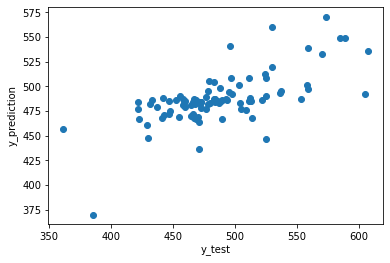

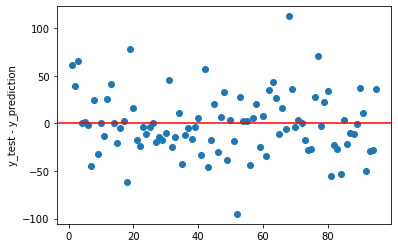

In [236]:

plt.scatter(y_test, y_prediction)
plt.xlabel('y_test')
plt.ylabel('y_prediction')
plt.show()
plt.scatter(my_length, (y_test - y_prediction))
plt.ylabel('y_test - y_prediction')
plt.axhline(y = 0, c = "red")
plt.show()

r2 score is  0.3856163033291493
mean_sqrd_error is== 798.712693126302
root_mean_squared error of is== 28.261505499995963


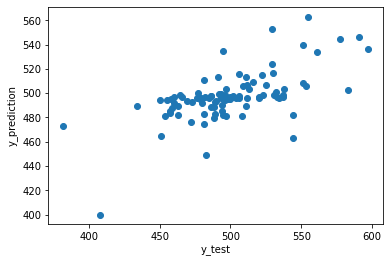

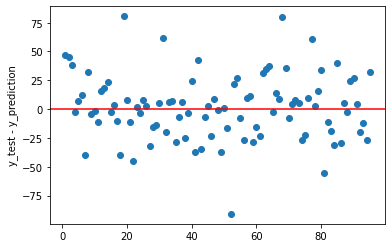

In [237]:
y = fin_merge_df['ELA']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# creating an object of LinearRegression class
LR = LinearRegression()

# fitting the training data
LR.fit(x_train,y_train)
y_prediction =  LR.predict(x_test)

# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

# predicting the accuracy score
score = r2_score(y_test,y_prediction)
print('r2 score is ', score)
print('mean_sqrd_error is==', mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==', np.sqrt(mean_squared_error(y_test,y_prediction)))


my_length = []
i = 1
while i <= len(y_test):
    my_length.append(i)
    i += 1

#scatter plot of test vs prediction
plt.scatter(y_test, y_prediction)
plt.xlabel('y_test')
plt.ylabel('y_prediction')
plt.show()
plt.scatter(my_length, (y_test - y_prediction))
plt.ylabel('y_test - y_prediction')
plt.axhline(y = 0, c = "red")
plt.show()

r2 score is  0.42902823488861985
mean_sqrd_error is== 3536.4387981466703
root_mean_squared error of is== 59.46796446950804


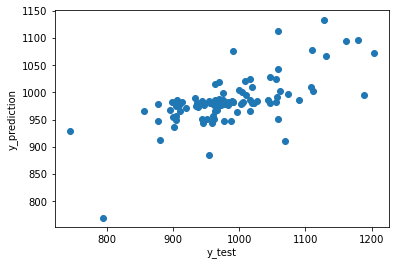

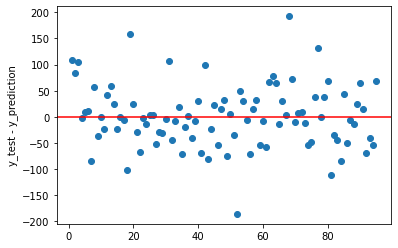

In [238]:
fin_merge_df['ELA/Math Sum'] = fin_merge_df['ELA'] +  fin_merge_df['Math']
y = fin_merge_df['ELA/Math Sum']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# creating an object of LinearRegression class
LR = LinearRegression()

# fitting the training data
LR.fit(x_train,y_train)
y_prediction =  LR.predict(x_test)

# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

# predicting the accuracy score
score = r2_score(y_test,y_prediction)
print('r2 score is ', score)
print('mean_sqrd_error is==', mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==', np.sqrt(mean_squared_error(y_test,y_prediction)))

my_length = []
i = 1
while i <= len(y_test):
    my_length.append(i)
    i += 1

#scatter plot of test vs prediction
plt.scatter(y_test, y_prediction)
plt.xlabel('y_test')
plt.ylabel('y_prediction')
plt.show()
plt.scatter(my_length, (y_test - y_prediction))
plt.ylabel('y_test - y_prediction')
plt.axhline(y = 0, c = "red")
plt.show()